<h1>Customer Classificaion Notebook</h1>

<h1>1. Importing Libraries</h1>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

<h1>2. Reading Dataset

In [2]:
df_clustered_customers = pd.read_csv('Clustered_Customers.csv')
df_clustered_customers.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Cluster
0,1,1,19,15000,39,5,1,4,0
1,2,1,21,35000,81,2,3,3,0
2,3,0,20,86000,6,2,1,1,0
3,4,0,23,59000,77,7,0,2,0
4,5,0,31,38000,40,3,2,6,0


<h1> 3. Data Splitting

In [3]:
# Define the features and target variable
X = df_clustered_customers.iloc[:,:-1].values
y = df_clustered_customers.iloc[:,-1].values

# Split the data into training and testing sets with a ratio of 7:3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shape of the resulting datasets
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (1375, 8), (1375,)
Testing set shape: (590, 8), (590,)


In [4]:
X

array([[   1,    1,   19, ...,    5,    1,    4],
       [   2,    1,   21, ...,    2,    3,    3],
       [   3,    0,   20, ...,    2,    1,    1],
       ...,
       [1998,    1,   87, ...,    5,    9,    2],
       [1999,    1,   77, ...,    4,    7,    2],
       [2000,    1,   90, ...,    3,    5,    2]])

In [5]:
y

array([0, 0, 0, ..., 0, 1, 0])

<h1> 4. Building a Classification Model <br>
<h3> Building the Classification Model
In this stage, we will build a classification model using : <br>

* Logistic Regression
* Decision Tree
* Random Forest
* K-Nearest Neighbors (K-NN)

These models will be trained using the training set that was previously split.

In [6]:
# Initialize the classifiers
lr_classifier = LogisticRegression(random_state=42, max_iter=1000)
dt_classifier = DecisionTreeClassifier(random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)
knn_classifier = KNeighborsClassifier()

# Train the classifiers
lr_classifier.fit(X_train, y_train)
dt_classifier.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)
knn_classifier.fit(X_train, y_train)

# Print a message indicating that the models have been trained
print("Models have been trained successfully.")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models have been trained successfully.


In [7]:
# Perform predictions using the test data
y_pred_lr = lr_classifier.predict(X_test)
y_pred_dt = dt_classifier.predict(X_test)
y_pred_rf = rf_classifier.predict(X_test)
y_pred_knn = knn_classifier.predict(X_test)

In [8]:
# Calculate evaluation metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')

accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')

accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')

accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')

# Print evaluation metrics
print(f"Logistic Regression - Accuracy: {accuracy_lr:.2f}, F1-Score: {f1_lr:.2f}, Precision: {precision_lr:.2f}, Recall: {recall_lr:.2f}")
print(f"Decision Tree - Accuracy: {accuracy_dt:.2f}, F1-Score: {f1_dt:.2f}, Precision: {precision_dt:.2f}, Recall: {recall_dt:.2f}")
print(f"Random Forest - Accuracy: {accuracy_rf:.2f}, F1-Score: {f1_rf:.2f}, Precision: {precision_rf:.2f}, Recall: {recall_rf:.2f}")
print(f"K-Nearest Neighbors - Accuracy: {accuracy_knn:.2f}, F1-Score: {f1_knn:.2f}, Precision: {precision_knn:.2f}, Recall: {recall_knn:.2f}")

Logistic Regression - Accuracy: 0.90, F1-Score: 0.90, Precision: 0.90, Recall: 0.90
Decision Tree - Accuracy: 1.00, F1-Score: 1.00, Precision: 1.00, Recall: 1.00
Random Forest - Accuracy: 1.00, F1-Score: 1.00, Precision: 1.00, Recall: 1.00
K-Nearest Neighbors - Accuracy: 1.00, F1-Score: 1.00, Precision: 1.00, Recall: 1.00


In [9]:
# Create confusion matrices
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

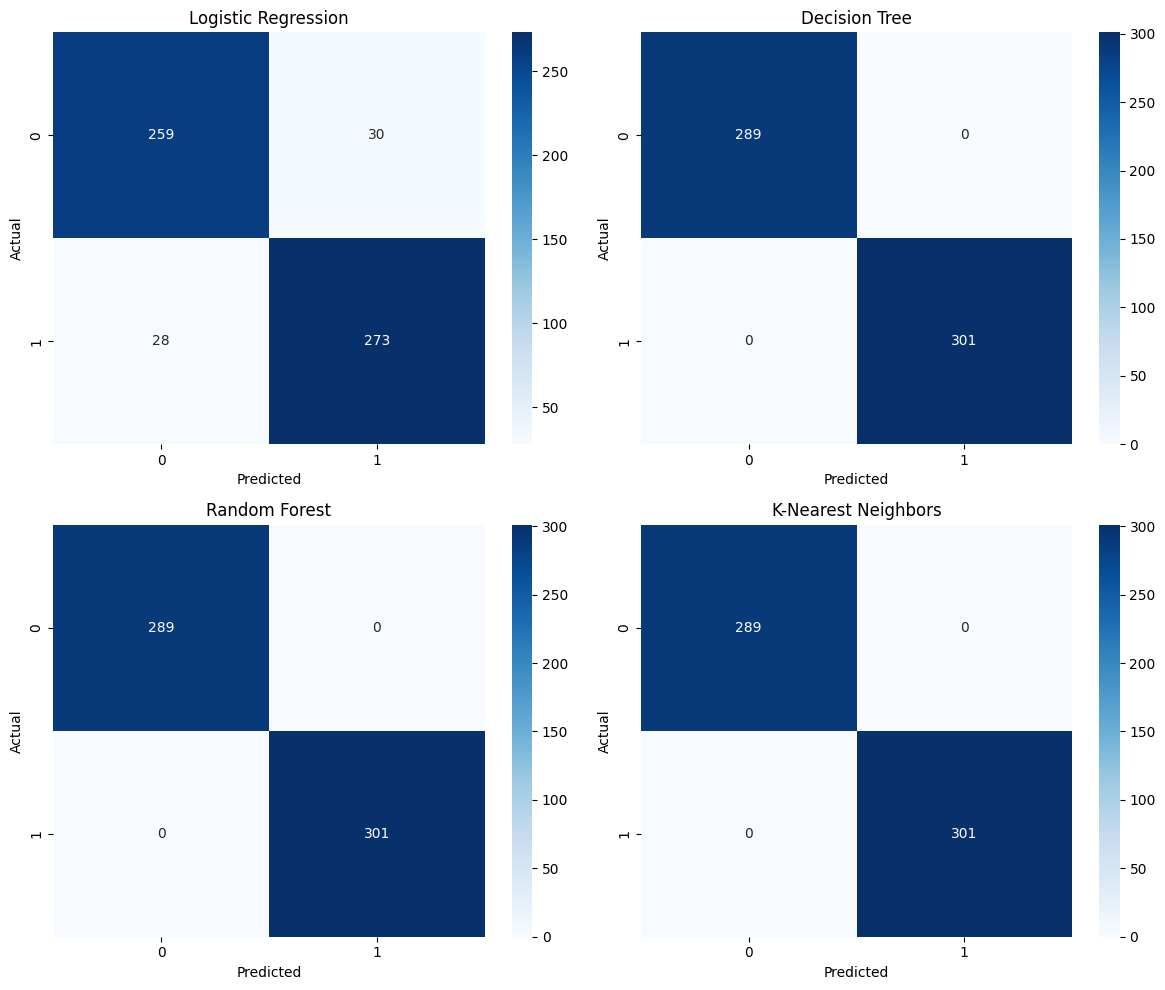

In [10]:
# Plot confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.heatmap(conf_matrix_lr, annot=True, fmt='d', ax=axes[0, 0], cmap='Blues')
axes[0, 0].set_title('Logistic Regression')
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Actual')

sns.heatmap(conf_matrix_dt, annot=True, fmt='d', ax=axes[0, 1], cmap='Blues')
axes[0, 1].set_title('Decision Tree')
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('Actual')

sns.heatmap(conf_matrix_rf, annot=True, fmt='d', ax=axes[1, 0], cmap='Blues')
axes[1, 0].set_title('Random Forest')
axes[1, 0].set_xlabel('Predicted')
axes[1, 0].set_ylabel('Actual')

sns.heatmap(conf_matrix_knn, annot=True, fmt='d', ax=axes[1, 1], cmap='Blues')
axes[1, 1].set_title('K-Nearest Neighbors')
axes[1, 1].set_xlabel('Predicted')
axes[1, 1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

<h5>From the evaluation of the classification models, we can determine how well the models classify data into the correct classes.<br>
Logistic Regression has an accuracy of 0.91, an F1-Score of 0.91, Precision of 0.91, and Recall of 0.91. Meanwhile, the Decision Tree, Random Forest, and K-Nearest Neighbors models all have perfect accuracy, F1-Score, Precision, and Recall values of 1.0. This indicates that these three models are able to classify the data very well, without errors, on the dataset used.